<a href="https://colab.research.google.com/github/Usermer/LLMs/blob/main/llms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#pip install torch transformers accelerate

In [ ]:
#pip install --upgrade ipywidgets


La bibiliotheque transformers

La bibliothèque 🤗 Transformers de Hugging Face est un outil puissant pour utiliser des modèles de transformeurs pré-entraînés dans le domaine du NLP, de la vision par ordinateur et de l'audio.

Points clés :

*   Accès à des milliers de modèles pré-entraînés (BERT, GPT-2, etc.).
*   API simples pour charger, utiliser et entraîner les modèles.
*   Supporte de nombreuses tâches (classification de texte, génération, NER, etc.).
*   Compatible avec PyTorch, TensorFlow et JAX.
*   Permet la personnalisation et l'entraînement de modèles.

En bref, Transformers simplifie l'utilisation des modèles de transformeurs de pointe pour les chercheurs et développeurs.

# **Pipeline**

La fonction `pipeline` de la bibliothèque 🤗 Transformers est une interface de haut niveau qui simplifie l'utilisation de modèles pré-entraînés pour des tâches spécifiques. Elle gère automatiquement de nombreuses étapes, telles que le prétraitement des données, le chargement du modèle et la post-traitement des résultats.

En gros, vous spécifiez la tâche que vous souhaitez effectuer (par exemple, "summarization", "text-classification", "question-answering") et `pipeline` charge un modèle approprié et configure tout ce dont vous avez besoin pour commencer à l'utiliser immédiatement.


***Summarization***

In [ ]:
from transformers import pipeline

summarizer = pipeline(
    "summarization",
    model="sshleifer/distilbart-cnn-12-6"  # modèle distillé et rapide
)

text="walking amid Gion's Machiya wooden houses is a mesmerizig experience .the beautifully preserved sturectures exuded an old-world charm that transports visitores back in time , making them fell like they had stepped into a living museum.the glow lanterns lining the narrow streets add tp the enchanting ambiance,making each stroll of memorable journey throug japan's rich cullural history"

summary=summarizer(text,
                   max_length=70,
                   min_length=30,  # longueur minimale du résumé
                  #  do_sample=False  # pas de génération aléatoire
                   )
print(summary[0]["summary_text"])

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Device set to use cpu


 Walking amid Gion's Machiya wooden houses is a mesmerizig experience . The beautifully preserved sturectures exuded an old-world charm that transports visitores back in time .


***Text generation***

In [ ]:
from transformers import pipeline

# Création du pipeline pour générer du texte
generator = pipeline("text-generation", model="gpt2")

# Texte de départ
prompt = "Once upon a time in a small village,"

# Génération du texte
result = generator(prompt, max_length=100, do_sample=True, temperature=0.8)

print(result[0]['generated_text'])


Device set to use cpu
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=100) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Once upon a time in a small village, it was used to deliver food to the dead.

In the end, there was one child that stayed in the village for a long time. He used to talk to the villagers about their food supplies, but they didn't like that.

He was quite happy when he got used to it.

「I wonder what they all think about it」(Keiichi)

「I don't think so」(Yup…!)

…Well, it is true that there will be a lot of dead children, but the villagers will surely take it into consideration.

「Well then, how about the rest of it? Let's go home.

「Eeeah, Yuna-sama, I can't resist that」(Yuna)

「Yes, I guess you're right. I'm just going to keep going to the village to buy food」(Yuna)

Yuna smiled at Keiichi.

「I really am glad that you chose to move to the village」(Keiichi)

「Well then, I really want to go home」(Yuna)

「Uh…」(Yuna)

「You're welcome Y


***language translation***

In [ ]:
spanish_text = "Este curso sobre LLMs se está poniendo muy interesante"

# Define the pipeline
translator = pipeline(task="translation_es_to_en", model="Helsinki-NLP/opus-mt-es-en")

# Translate the Spanish text
translations = translator(spanish_text, clean_up_tokenization_spaces=True)

print(translations[0]["translation_text"])

/usr/local/lib/python3.12/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")
Device set to use cpu


This course on LLMs is getting very interesting.


## Autoclasses dans Transformers

Les "autoclasses" comme `AutoModel`, `AutoTokenizer`, `AutoConfig`, etc., sont des classes de la bibliothèque Transformers qui vous permettent de charger automatiquement la bonne architecture de modèle, de tokenizer ou de configuration en fonction du nom ou du chemin d'un modèle pré-entraîné.

Au lieu d'avoir à spécifier explicitement la classe de modèle (par exemple, `BertModel`, `GPT2Tokenizer`), vous pouvez utiliser l'autoclasse correspondante et la bibliothèque déterminera la classe appropriée à charger.

Cela rend votre code plus flexible et plus facile à utiliser avec différents modèles sans avoir à modifier le code pour chaque nouveau modèle.


Voici un tableau des autoclasses courantes dans la bibliothèque 🤗 Transformers :

| Type          | Autoclasse      | Description                                                                 | Exemple d'utilisation                                                                 |
| :------------ | :-------------- | :-------------------------------------------------------------------------- | :------------------------------------------------------------------------------------ |
| **Tokenizers** | `AutoTokenizer` | Charge automatiquement le tokenizer approprié pour un modèle donné.           | `tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")`                    |
| **Base Models**    | `AutoModel`     | Charge automatiquement l'architecture de modèle de base.                      | `model = AutoModel.from_pretrained("bert-base-uncased")`                              |
| **Pour la classification** | `AutoModelForSequenceClassification` | Charge un modèle avec une tête de classification de séquence.             | `model = AutoModelForSequenceClassification.from_pretrained("bert-base-uncased")`   |
|               | `AutoModelForTokenClassification` | Charge un modèle avec une tête de classification de tokens (NER).        | `model = AutoModelForTokenClassification.from_pretrained("bert-base-uncased")`      |
|**Pour question-réponse**               | `AutoModelForQuestionAnswering` | Charge un modèle avec une tête de réponse à des questions.              | `model = AutoModelForQuestionAnswering.from_pretrained("bert-large-uncased-whole-word-masking")` |
|**Pour la génération du texte**               | `AutoModelForCausalLM` | Charge un modèle pour la modélisation causale du langage (génération de texte). | `model = AutoModelForCausalLM.from_pretrained("gpt2")`                                |
|**Pour le texte à texte**               | `AutoModelForSeq2SeqLM` | Charge un modèle pour les tâches séquence à séquence (traduction, résumé). | `model = AutoModelForSeq2SeqLM.from_pretrained("t5-small")`                           |
| **Configurations** | `AutoConfig`    | Charge automatiquement la configuration appropriée pour un modèle donné.    | `config = AutoConfig.from_pretrained("bert-base-uncased")`                            |

***`AutoTokenizer`***

Sert à transformer le texte en tokens numériques (et inversement).

In [ ]:
from transformers import AutoTokenizer

tokenizer=AutoTokenizer.from_pretrained("bert-base-uncased")
text="meryem kada"

#convertir le texte en nombres
tokens=tokenizer(text)
print("tokens:",tokens)#retourne un dictionnaire


#convertir les nombres en texte
decoded=tokenizer.decode(tokens["input_ids"])
print("le texte initial:",decoded)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokens: {'input_ids': [101, 21442, 6672, 2213, 10556, 2850, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1]}
le texte initial: [CLS] meryem kada [SEP]


**`AutoModel`**

Charge le modèle de base sans couche de classification ni génération.
Idéal pour obtenir des représentations (embeddings).

In [ ]:
from transformers import AutoTokenizer, AutoModel
import torch

tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")
model = AutoModel.from_pretrained("distilbert-base-uncased")

inputs = tokenizer("I love natural language processing.", return_tensors="pt")
outputs = model(**inputs)

print(outputs.last_hidden_state.shape)  # (batch_size, sequence_length, hidden_size)


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

torch.Size([1, 8, 768])


***Explication***

In [ ]:
#Étape 1 — Le tokenizer
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")


**Exemple :**

"I love natural language processing."


**devient quelque chose comme :**

[101, 1045, 2293, 3019, 2653, 9923, 1012, 102]


(ce sont les identifiants des mots dans le vocabulaire du modèle)

In [ ]:
#Étape 2 — Conversion du texte en tenseur PyTorch
inputs = tokenizer("I love natural language processing.", return_tensors="pt")

`"pt"` = PyTorch (donc le tokenizer retourne des tenseurs PyTorch)

Le résultat (inputs) est un dictionnaire avec :

{
  '***input_ids***':*tensor([[ 101, 1045, 2293, 3019, 2653, 9923,* *1012, 102]])*,
  '***attention_mask***': *tensor([[1, 1, 1, 1, 1, 1, 1, 1]])*
}


📌 input_ids → les mots encodés

📌 attention_mask → indique au modèle quels tokens sont du texte (1) ou du padding (0)

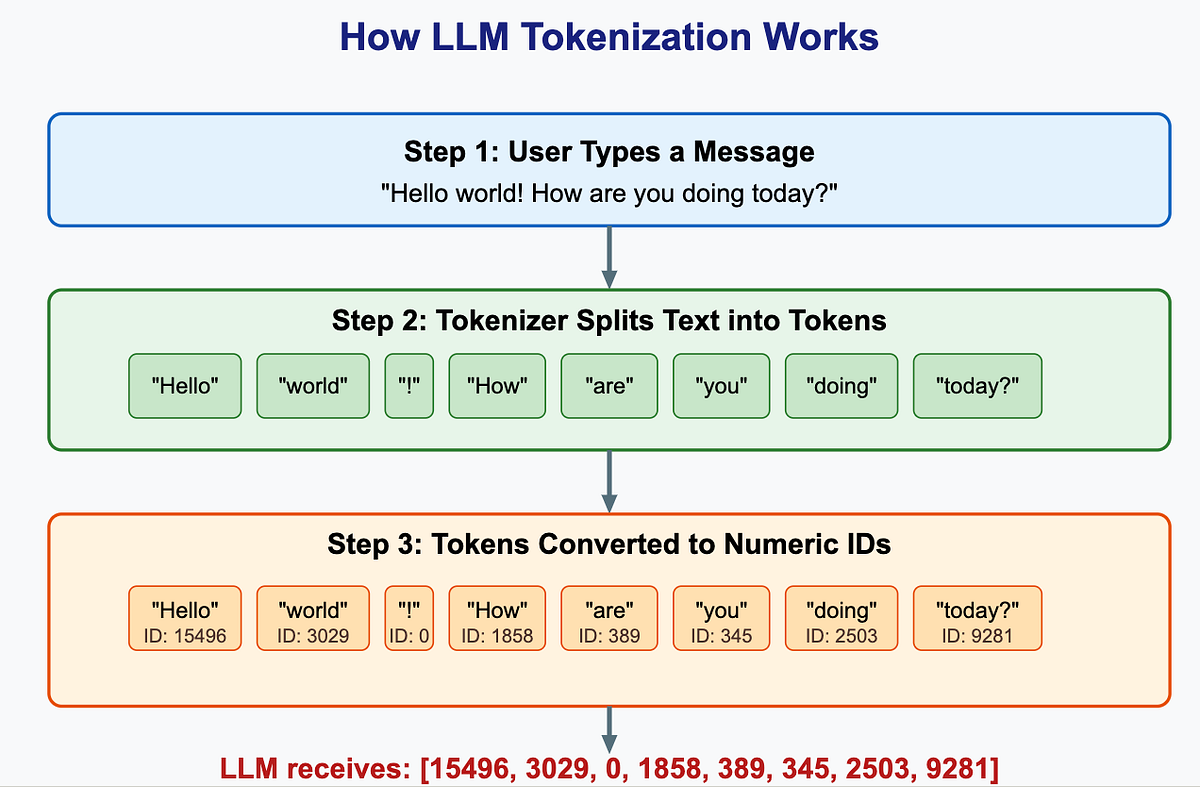

In [ ]:
#Étape 3 — Passage du texte dans le modèle
outputs = model(**inputs)

👉 Ici, on passe les entrées (inputs) dans le modèle distilbert-base-uncased.

Le modèle renvoie un objet appelé BaseModelOutput contenant :

last_hidden_state → les représentations internes du texte

(et parfois d’autres attributs, selon le modèle)

In [ ]:
#Étape 4 — Interprétation du résultat
print(outputs.last_hidden_state.shape)




torch.Size([1, 8, 768])


Pour ta phrase, on obtien quelque chose comme :

`torch.Size([1, 8, 768])`

Voici la signification de chaque dimension dans ce cas :

| Dimension | Signification                                      |
| :-------- | :------------------------------------------------- |
| **1**     | Le nombre de phrases dans le lot (batch size). Ici, vous n'avez passé qu'une seule phrase. |
| **8**     | Le nombre de tokens dans la phrase après tokenization (y compris les tokens spéciaux comme `[CLS]` et `[SEP]`). |
| **768**   | La taille du vecteur caché (hidden size) du modèle DistilBERT. C'est la dimension de l'embedding pour chaque token. |

DistilBERT transforme chaque mot de la phrase en un vecteur de 768 nombres, qui représentent son sens dans le contexte.

Exemple simplifié :

“I” → [0.12, 0.98, -0.33, …, 0.07]

“love” → [0.45, -0.21, 0.66, …, 0.12]

etc.

Ce sont ces vecteurs que le modèle utilise ensuite pour :

* la classification de texte 🧾

* l’analyse de sentiments ❤️😡

* la recherche sémantique 🔍

* ou d’autres tâches NLP.